## Data Leakage

L1(Lasso) and L2 (Ridge) regularization using Linear Regression.
We will use cross validation, lasso and ridge regression in this lab.

Specifically speaking,
Regularization basically adds the penalty as model complexity increases.
Cross validation is used to evaluate how well our model can generalize on the dataset.

We will be using r2 score in this lab. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model.

### Importing Data

In [44]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Sklearn linear regression model
from sklearn.linear_model import LinearRegression

# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score

# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

# Feature selection using Recursive Feature Elimimation
from sklearn.feature_selection import RFE

In [45]:
data = pd.read_csv('Data/bike.csv')

In [46]:
data.head()

,id,season,year,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt
0,12765,winter,2016,0,6,0,cloud,0.344167,0.363625,0.805833,0.160446,7,1,2,2,226,654,880
1,12766,winter,2016,0,0,0,cloud,0.363478,0.353739,0.696087,0.248539,8,1,8,1,125,670,795
2,12767,winter,2016,0,1,1,fair,0.196364,0.189405,0.437273,0.248309,3,1,10,2,75,1229,1304
3,12768,winter,2016,0,2,1,fair,0.200000,0.212122,0.590435,0.160296,0,1,8,3,67,1454,1521
4,12769,winter,2016,0,3,1,fair,0.226957,0.229270,0.436957,0.186900,2,0,5,1,58,1518,1576


In [47]:
# Checking the data types of each column
for i in data:
    print(i, ":", type(data[i][0]))

id : <class 'numpy.int64'>
season : <class 'str'>
year : <class 'numpy.int64'>
holiday : <class 'numpy.int64'>
weekday : <class 'numpy.int64'>
workingday : <class 'numpy.int64'>
weather : <class 'str'>
temp : <class 'numpy.float64'>
feel_temp : <class 'numpy.float64'>
hum : <class 'numpy.float64'>
windspeed : <class 'numpy.float64'>
promotion_level : <class 'numpy.int64'>
promotion_type : <class 'numpy.int64'>
promotion_level_external : <class 'numpy.int64'>
promotion_type_external : <class 'numpy.int64'>
casual : <class 'numpy.int64'>
registered : <class 'numpy.int64'>
cnt : <class 'numpy.int64'>


In [48]:
# Check for null values
data.isnull().sum()

id                          0
season                      0
year                        0
holiday                     0
weekday                     0
workingday                  0
weather                     0
temp                        0
feel_temp                   0
hum                         0
windspeed                   0
promotion_level             0
promotion_type              0
promotion_level_external    0
promotion_type_external     0
casual                      0
registered                  0
cnt                         0
dtype: int64

In [49]:
#Printing the unique values

print("Seasons: ", data['season'].unique())
print("Promotion Type: ", data['promotion_type'].unique())
print("Weather: ", data['weather'].unique())
print("Year: ", data['year'].unique())

Seasons:  ['winter' 'spring' 'summer' 'autumn']
Promotion Type:  [1 0]
Weather:  ['cloud' 'fair' 'rain']
Year:  [2016]


In [50]:
#Printing the count of unique values

values = ['season', 'year', 'weather', 'promotion_type']

for i in values:
    print(i)
    print(data[i].value_counts())
    print('\n\n-------------\n\n')

season
summer    92
spring    92
autumn    91
winter    90
Name: season, dtype: int64


-------------


year
2016    365
Name: year, dtype: int64


-------------


weather
fair     226
cloud    124
rain      15
Name: weather, dtype: int64


-------------


promotion_type
1    183
0    182
Name: promotion_type, dtype: int64


-------------




In [51]:
# Dropping useless features
data = data.drop('id', axis = 1)

In [52]:
# Checking the data shape
data

,season,year,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt
0,winter,2016,0,6,0,cloud,0.344167,0.363625,0.805833,0.160446,7,1,2,2,226,654,880
1,winter,2016,0,0,0,cloud,0.363478,0.353739,0.696087,0.248539,8,1,8,1,125,670,795
2,winter,2016,0,1,1,fair,0.196364,0.189405,0.437273,0.248309,3,1,10,2,75,1229,1304
3,winter,2016,0,2,1,fair,0.200000,0.212122,0.590435,0.160296,0,1,8,3,67,1454,1521
4,winter,2016,0,3,1,fair,0.226957,0.229270,0.436957,0.186900,2,0,5,1,58,1518,1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,winter,2016,0,2,1,cloud,0.325000,0.327633,0.762500,0.188450,3,1,10,1,67,1059,1126
361,winter,2016,0,3,1,fair,0.299130,0.279974,0.503913,0.293961,4,0,1,0,144,2047,2191
362,winter,2016,0,4,1,fair,0.248333,0.263892,0.574167,0.119412,5,0,3,3,145,2169,2314
363,winter,2016,0,5,1,fair,0.311667,0.318812,0.636667,0.134337,4,0,6,0,278,2508,2786


### One Hot encoding


In [53]:
# Label Encoding first
categorical = ['season', 'weather']

data['season'] = LabelEncoder().fit_transform(data['season'])
data['weather'] = LabelEncoder().fit_transform(data['weather'])

In [54]:
data

,season,year,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt
0,3,2016,0,6,0,0,0.344167,0.363625,0.805833,0.160446,7,1,2,2,226,654,880
1,3,2016,0,0,0,0,0.363478,0.353739,0.696087,0.248539,8,1,8,1,125,670,795
2,3,2016,0,1,1,1,0.196364,0.189405,0.437273,0.248309,3,1,10,2,75,1229,1304
3,3,2016,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0,1,8,3,67,1454,1521
4,3,2016,0,3,1,1,0.226957,0.229270,0.436957,0.186900,2,0,5,1,58,1518,1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,3,2016,0,2,1,0,0.325000,0.327633,0.762500,0.188450,3,1,10,1,67,1059,1126
361,3,2016,0,3,1,1,0.299130,0.279974,0.503913,0.293961,4,0,1,0,144,2047,2191
362,3,2016,0,4,1,1,0.248333,0.263892,0.574167,0.119412,5,0,3,3,145,2169,2314
363,3,2016,0,5,1,1,0.311667,0.318812,0.636667,0.134337,4,0,6,0,278,2508,2786


In [55]:
# Checking the data types of each column
for i in data:
    print(i, ":", type(data[i][0]))

season : <class 'numpy.int32'>
year : <class 'numpy.int64'>
holiday : <class 'numpy.int64'>
weekday : <class 'numpy.int64'>
workingday : <class 'numpy.int64'>
weather : <class 'numpy.int32'>
temp : <class 'numpy.float64'>
feel_temp : <class 'numpy.float64'>
hum : <class 'numpy.float64'>
windspeed : <class 'numpy.float64'>
promotion_level : <class 'numpy.int64'>
promotion_type : <class 'numpy.int64'>
promotion_level_external : <class 'numpy.int64'>
promotion_type_external : <class 'numpy.int64'>
casual : <class 'numpy.int64'>
registered : <class 'numpy.int64'>
cnt : <class 'numpy.int64'>


In [56]:
# One Hot Encoding the data
data = pd.concat([data, pd.get_dummies(data['season'], prefix='ses')],axis=1)

# Now drop the original 'season' column
data.drop(['season'],axis=1, inplace=True)

In [57]:
# One Hot Encoding the data
data = pd.concat([data, pd.get_dummies(data['weather'], prefix='wea')],axis=1)

# Now drop the original 'weather' column
data.drop(['weather'],axis=1, inplace=True)

In [58]:
data

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,...,casual,registered,cnt,ses_0,ses_1,ses_2,ses_3,wea_0,wea_1,wea_2
0,2016,0,6,0,0.344167,0.363625,0.805833,0.160446,7,1,...,226,654,880,0,0,0,1,1,0,0
1,2016,0,0,0,0.363478,0.353739,0.696087,0.248539,8,1,...,125,670,795,0,0,0,1,1,0,0
2,2016,0,1,1,0.196364,0.189405,0.437273,0.248309,3,1,...,75,1229,1304,0,0,0,1,0,1,0
3,2016,0,2,1,0.200000,0.212122,0.590435,0.160296,0,1,...,67,1454,1521,0,0,0,1,0,1,0
4,2016,0,3,1,0.226957,0.229270,0.436957,0.186900,2,0,...,58,1518,1576,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2016,0,2,1,0.325000,0.327633,0.762500,0.188450,3,1,...,67,1059,1126,0,0,0,1,1,0,0
361,2016,0,3,1,0.299130,0.279974,0.503913,0.293961,4,0,...,144,2047,2191,0,0,0,1,0,1,0
362,2016,0,4,1,0.248333,0.263892,0.574167,0.119412,5,0,...,145,2169,2314,0,0,0,1,0,1,0
363,2016,0,5,1,0.311667,0.318812,0.636667,0.134337,4,0,...,278,2508,2786,0,0,0,1,0,1,0


### X and Y

Target feature "cnt" is the sum of the features "registered" + "casual"

To avoid data leakage remove the feature "casual" for the training purpose.

To understand more about data leakage refer the article mentioned in the uselful links.

In [59]:
X = data[[i for i in data.columns if i not in ['cnt', 'casual']]]
y = data['cnt']

In [60]:
# Checking the columns
X

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,registered,ses_0,ses_1,ses_2,ses_3,wea_0,wea_1,wea_2
0,2016,0,6,0,0.344167,0.363625,0.805833,0.160446,7,1,2,2,654,0,0,0,1,1,0,0
1,2016,0,0,0,0.363478,0.353739,0.696087,0.248539,8,1,8,1,670,0,0,0,1,1,0,0
2,2016,0,1,1,0.196364,0.189405,0.437273,0.248309,3,1,10,2,1229,0,0,0,1,0,1,0
3,2016,0,2,1,0.200000,0.212122,0.590435,0.160296,0,1,8,3,1454,0,0,0,1,0,1,0
4,2016,0,3,1,0.226957,0.229270,0.436957,0.186900,2,0,5,1,1518,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2016,0,2,1,0.325000,0.327633,0.762500,0.188450,3,1,10,1,1059,0,0,0,1,1,0,0
361,2016,0,3,1,0.299130,0.279974,0.503913,0.293961,4,0,1,0,2047,0,0,0,1,0,1,0
362,2016,0,4,1,0.248333,0.263892,0.574167,0.119412,5,0,3,3,2169,0,0,0,1,0,1,0
363,2016,0,5,1,0.311667,0.318812,0.636667,0.134337,4,0,6,0,2508,0,0,0,1,0,1,0


In [61]:
# Checking the columns
y

0       880
1       795
2      1304
3      1521
4      1576
       ... 
360    1126
361    2191
362    2314
363    2786
364    2225
Name: cnt, Length: 365, dtype: int64

In [62]:
# Store the names of the training features / name of the columns used for training.

train_columns = list(X.columns)
print(train_columns)

['year', 'holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_type', 'promotion_level_external', 'promotion_type_external', 'registered', 'ses_0', 'ses_1', 'ses_2', 'ses_3', 'wea_0', 'wea_1', 'wea_2']


In [63]:
X.head()

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,registered,ses_0,ses_1,ses_2,ses_3,wea_0,wea_1,wea_2
0,2016,0,6,0,0.344167,0.363625,0.805833,0.160446,7,1,2,2,654,0,0,0,1,1,0,0
1,2016,0,0,0,0.363478,0.353739,0.696087,0.248539,8,1,8,1,670,0,0,0,1,1,0,0
2,2016,0,1,1,0.196364,0.189405,0.437273,0.248309,3,1,10,2,1229,0,0,0,1,0,1,0
3,2016,0,2,1,0.200000,0.212122,0.590435,0.160296,0,1,8,3,1454,0,0,0,1,0,1,0
4,2016,0,3,1,0.226957,0.229270,0.436957,0.186900,2,0,5,1,1518,0,0,0,1,0,1,0


**Normalizing**

In [64]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [65]:
# Checking and converting into DataFrame
X = pd.DataFrame(X, columns = train_columns)
X

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,registered,ses_0,ses_1,ses_2,ses_3,wea_0,wea_1,wea_2
0,0.0,0.0,1.000000,0.0,0.360789,0.373517,0.828620,0.284606,0.777778,1.0,0.111111,0.666667,0.056694,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.385232,0.360541,0.715771,0.466215,0.888889,1.0,0.777778,0.333333,0.060505,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.166667,1.0,0.173705,0.144830,0.449638,0.465740,0.333333,1.0,1.000000,0.666667,0.193664,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.333333,1.0,0.178308,0.174649,0.607131,0.284297,0.000000,1.0,0.777778,1.000000,0.247261,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.500000,1.0,0.212429,0.197158,0.449313,0.339143,0.222222,0.0,0.444444,0.333333,0.262506,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,0.0,0.333333,1.0,0.336528,0.326273,0.784062,0.342338,0.333333,1.0,1.000000,0.333333,0.153168,0.0,0.0,0.0,1.0,1.0,0.0,0.0
361,0.0,0.0,0.500000,1.0,0.303783,0.263714,0.518162,0.559854,0.444444,0.0,0.000000,0.000000,0.388518,0.0,0.0,0.0,1.0,0.0,1.0,0.0
362,0.0,0.0,0.666667,1.0,0.239486,0.242604,0.590403,0.200012,0.555556,0.0,0.222222,1.000000,0.417580,0.0,0.0,0.0,1.0,0.0,1.0,0.0
363,0.0,0.0,0.833333,1.0,0.319652,0.314694,0.654670,0.230781,0.444444,0.0,0.555556,0.000000,0.498333,0.0,0.0,0.0,1.0,0.0,1.0,0.0


**Splitting**

In [66]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [67]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (292, 20) , y_train: (292,)
X_test: (73, 20) , y_test: (73,)


### Model

In [68]:
# Initializing the model
model = LinearRegression()

In [69]:
# Fitting the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Print the score on training set
y_pred_train = model.predict(X_train)
print("On Training set : ", r2_score(y_train, y_pred_train))

On Training set :  0.9865270749761277


In [71]:
# Print the score on the test set
y_pred_test = model.predict(X_test)
print("On testing set : ", r2_score(y_test, y_pred_test))

On testing set :  0.9856057999648005


### Observing the distribution of weights

In [72]:
# Custom summary function to plot the coefficients / weightage of the features.
def custom_summary(model, column_names, title):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle(title, fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left' if width<0 else 'right', va='bottom')        
    plt.show()

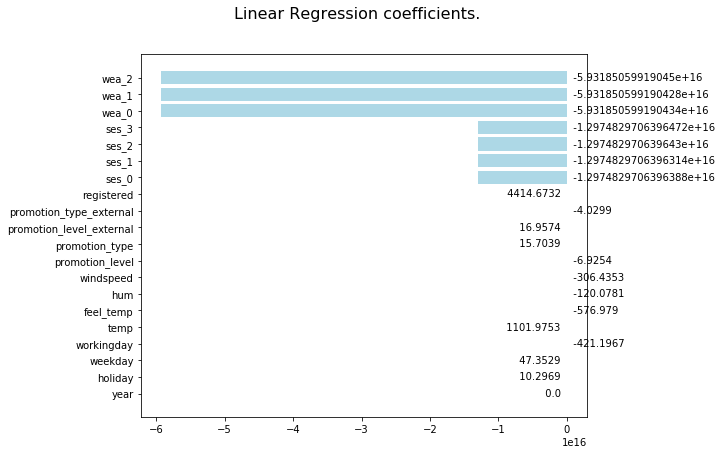

In [73]:
# Coefficients plot

custom_summary(model, train_columns, "Linear Regression coefficients.")

In [74]:
# Evaluate the model with k = 10 Fold Cross validation

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
results = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = folds)

print(type(model).__name__)
print('\n-------------\n')
print("kFoldCV:")
print("Fold R2 scores:\n", results)
print('\n\n-------------\n\n')
print("Mean R2 score:", results.mean())
print('\n\n-------------\n\n')
print("Std R2 score:", results.std())
print('\n\n-------------\n\n')
print("Generalizability on training set : ", results.mean(), " +/- ", results.std())

LinearRegression

-------------

kFoldCV:
Fold R2 scores:
 [0.98398048 0.98704194 0.98309002 0.96920996 0.98493711 0.9797532
 0.98939104 0.98625667 0.96783342 0.99125792]


-------------


Mean R2 score: 0.9822751749605827


-------------


Std R2 score: 0.007524506811677619


-------------


Generalizability on training set :  0.9822751749605827  +/-  0.007524506811677619


**Feature selection using Variance**

In [75]:
print("Original shape of X_train : ", X_train.shape)

Original shape of X_train :  (292, 20)


In [76]:
# Check the variance of X.
# Note the type(X) should be a pandas DataFrame as stated earlier.

X.var()

year                        0.000000
holiday                     0.026720
weekday                     0.111796
workingday                  0.216393
temp                        0.057592
feel_temp                   0.049115
hum                         0.023394
windspeed                   0.025126
promotion_level             0.044400
promotion_type              0.250685
promotion_level_external    0.104256
promotion_type_external     0.134599
registered                  0.063770
ses_0                       0.187671
ses_1                       0.189041
ses_2                       0.189041
ses_3                       0.186286
wea_0                       0.224928
wea_1                       0.236444
wea_2                       0.039515
dtype: float64

### Variance Threshold

In [77]:
# You can change the threshold value
sel = VarianceThreshold(threshold = (0.01))
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [78]:
selected_features = list(X_train.columns[sel.get_support()])
print("Selected features : ", selected_features)
print('\n\n-------------\n\n')
removed_features = list(X_train.columns[~sel.get_support()])
print("Removed features : ", removed_features)

Selected features :  ['holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_type', 'promotion_level_external', 'promotion_type_external', 'registered', 'ses_0', 'ses_1', 'ses_2', 'ses_3', 'wea_0', 'wea_1', 'wea_2']


-------------


Removed features :  ['year']


In [79]:
# Delete the removed features from the train_columns list.
for i in removed_features:
    train_columns.remove(i)

In [80]:
train_columns

['holiday',
 'weekday',
 'workingday',
 'temp',
 'feel_temp',
 'hum',
 'windspeed',
 'promotion_level',
 'promotion_type',
 'promotion_level_external',
 'promotion_type_external',
 'registered',
 'ses_0',
 'ses_1',
 'ses_2',
 'ses_3',
 'wea_0',
 'wea_1',
 'wea_2']

In [81]:
# Transform/Remove the low variance features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [82]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.000000,0.0,0.945149,0.854166,0.494430,0.293609,0.222222,1.0,1.000000,1.000000,0.562649,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.500000,1.0,0.444118,0.421587,0.997858,0.502572,0.888889,0.0,0.555556,1.000000,0.056932,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.833333,1.0,0.998944,1.000000,0.596830,0.228231,0.555556,0.0,0.888889,0.333333,0.573845,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.666667,1.0,0.450447,0.434828,0.619966,0.385896,0.111111,1.0,0.000000,1.000000,0.453549,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.000000,0.0,0.261637,0.234307,0.405313,0.385880,0.555556,0.0,0.333333,1.000000,0.261791,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.0,0.000000,0.0,0.411649,0.395131,0.542304,0.511703,0.666667,1.0,0.777778,1.000000,0.242735,0.0,1.0,0.0,0.0,0.0,1.0,0.0
288,0.0,0.000000,0.0,0.503188,0.481247,0.493144,0.579511,0.444444,0.0,0.000000,1.000000,0.421629,0.0,1.0,0.0,0.0,0.0,1.0,0.0
289,0.0,0.500000,1.0,0.728915,0.651183,0.872751,0.260245,0.666667,1.0,0.222222,0.333333,0.717246,1.0,0.0,0.0,0.0,1.0,0.0,0.0
290,0.0,0.666667,1.0,0.459940,0.437327,0.652100,0.506421,0.666667,0.0,0.111111,1.000000,0.741305,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [83]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.500000,1.0,0.870259,0.801146,0.649529,0.255099,0.444444,0.0,0.000000,0.666667,0.757027,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.666667,1.0,0.161798,0.129699,0.450207,0.526439,0.222222,1.0,0.777778,0.000000,0.255598,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.000000,0.0,0.218391,0.203652,0.497429,0.342303,0.666667,0.0,0.111111,0.666667,0.127918,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.000000,0.0,0.366062,0.371854,0.755355,0.143613,0.444444,0.0,0.555556,0.666667,0.543354,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000000,0.0,0.359917,0.357088,0.699229,0.212044,0.555556,1.0,0.222222,1.000000,0.307766,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.0,1.000000,0.0,1.000000,0.951946,0.514139,0.224357,0.555556,1.0,0.444444,0.000000,0.448309,0.0,0.0,1.0,0.0,0.0,1.0,0.0
69,0.0,0.666667,1.0,0.285898,0.251715,0.828620,0.456418,0.555556,1.0,0.666667,0.333333,0.305622,0.0,1.0,0.0,0.0,1.0,0.0,0.0
70,0.0,0.333333,1.0,0.449393,0.419099,0.660240,0.753859,0.666667,0.0,0.666667,0.000000,0.288709,0.0,1.0,0.0,0.0,1.0,0.0,0.0
71,0.0,0.333333,1.0,0.930383,0.866609,0.574979,0.366672,0.444444,0.0,0.000000,1.000000,0.757504,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Lasso Regression : L1 - norm

In [84]:
from sklearn.linear_model import Lasso

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Hyperparamater alpha : controls the degree of penaliation.
# Play around with alpha values.
alpha = 1.0

# Create the model
model_lasso = Lasso(alpha = alpha)

# Fit the model on training data
model_lasso.fit(X_train, y_train)

# Calculate the score on training data
y_pred_train = model_lasso.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))

On train set :  0.9865904455862373


In [85]:
# Evaluate the model on testing data
y_pred_test = model_lasso.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9867199930616883


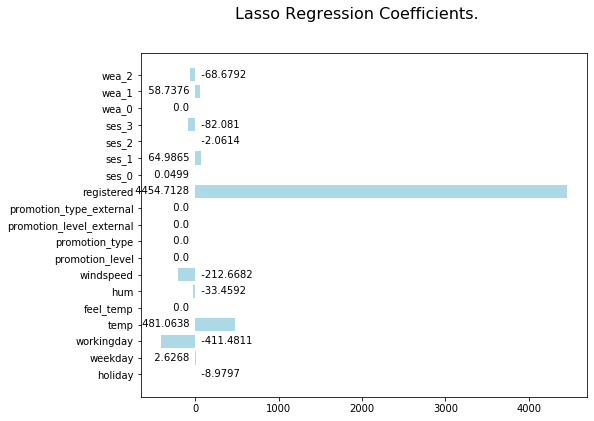

In [86]:
# Visualize the coefficients.
# Compare the results with the plot obtained earlier.

custom_summary(model_lasso, train_columns, "Lasso Regression Coefficients.")

We can see that Lasso regression has automatically done a lot of feature selection. Some columns might have zero coefficients. It has been effectively removed.

The model is much more interpretable than the baseline linear regression model.

Hence, Lasso regression has embedded Feature Selection.

### Ridge Regression : L2 - norm

In [88]:
from sklearn.linear_model import Ridge

# hyperparamater alpha : controls the degree of penaliation.
# play around with alpha values.
alpha = 1.0

#create the model
model_ridge = Ridge(alpha = alpha)

#fit the model on training data
model_ridge.fit(X_train, y_train)

#calculate the score on training data
y_pred_train = model_ridge.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))

On train set :  0.9812555580981217


In [89]:
# Evaluate the model on testing data
y_pred_test = model_ridge.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9768328468340931


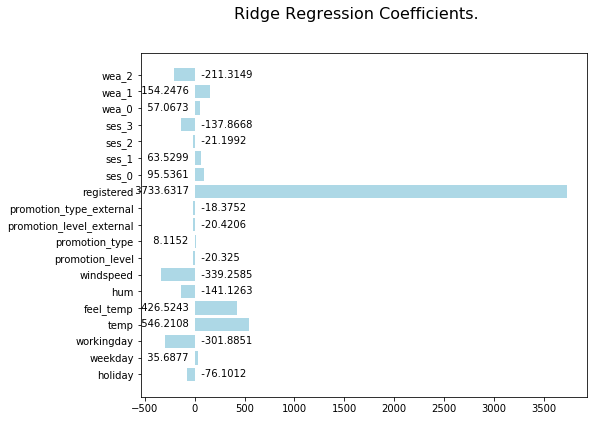

In [90]:
# Visualize the coefficients.
# Compare the results with the plot obtained earlier.

custom_summary(model_ridge, train_columns, "Ridge Regression Coefficients.")

Ridge regression doesn't drive smaller coefficients to 0 hence it doesn't possess internal feature selection.